In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [36]:
df=pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart.csv')

In [37]:
dataset= pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [38]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_3,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible
0,63,145,233,150,2.3,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,0
1,67,160,286,108,1.5,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,67,120,229,129,2.6,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,37,130,250,187,3.5,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,41,130,204,172,1.4,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,52,118,186,190,0.0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
299,43,132,341,136,3.0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,65,135,254,127,2.8,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
301,48,130,256,150,0.0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [40]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
k=[i for i in range(1,30)]
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [44]:
from sklearn.metrics import accuracy_score
accuracy=[]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

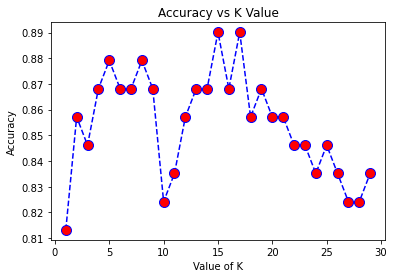

In [45]:
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value")
plt.plot(k,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

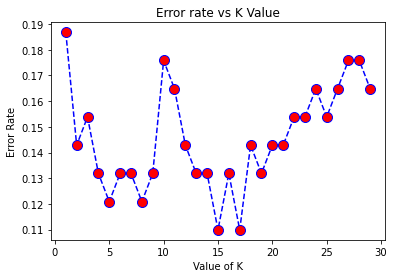

In [46]:
error=[(1-i) for i in accuracy]
plt.xlabel("Value of K")
plt.ylabel("Error Rate")
plt.title("Error rate vs K Value")
plt.plot(k,error,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8791208791208791


In [48]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1], dtype=int64)

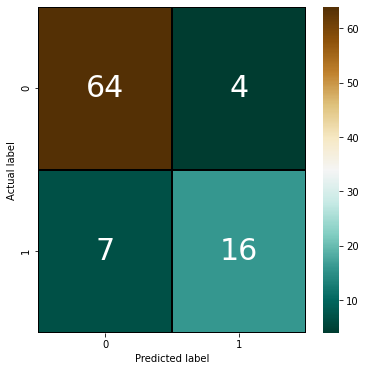

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True,cmap='BrBG_r',linewidths=1, linecolor='black',annot_kws={"size": 30})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [50]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for K-Nearest Neighbours Algorithm:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for K-Nearest Neighbours Algorithm:',(TP/(TP+FN)))
print('Testing Specificity for K-Nearest Neighbours Algorithm:',(TN/(TN+FP)))
print('Testing Precision for K-Nearest Neighbours Algorithm:',(TP/(TP+FP)))

Testing Accuracy for K-Nearest Neighbours Algorithm: 0.8791208791208791
Testing Sensitivity for K-Nearest Neighbours Algorithm: 0.9014084507042254
Testing Specificity for K-Nearest Neighbours Algorithm: 0.8
Testing Precision for K-Nearest Neighbours Algorithm: 0.9411764705882353
